In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:

from pandas import read_csv
from matplotlib import pyplot

path = '/content/drive/My Drive/Facebook Prop/AirPassengers.csv'
df = read_csv(path)
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [47]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


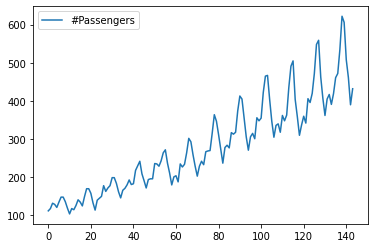

In [48]:
df.plot()
pyplot.show()

In [49]:

from pandas import to_datetime
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [50]:
from fbprophet import Prophet
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


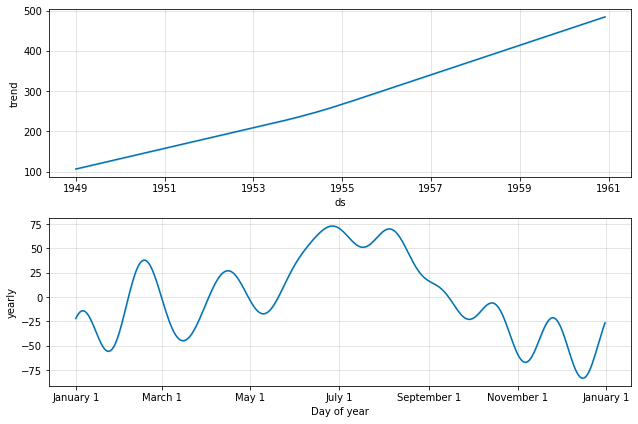

In [51]:
fig = model.plot_components(model.predict(df))


In [52]:
forecast = model.predict(df[132:])

In [53]:

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 1960-01-01  426.243193  397.534376  454.273976
1 1960-02-01  419.254592  389.281685  446.630045
2 1960-03-01  455.016543  426.462949  483.726913
3 1960-04-01  455.569231  425.820297  484.835596
4 1960-05-01  458.439780  428.856589  488.565036


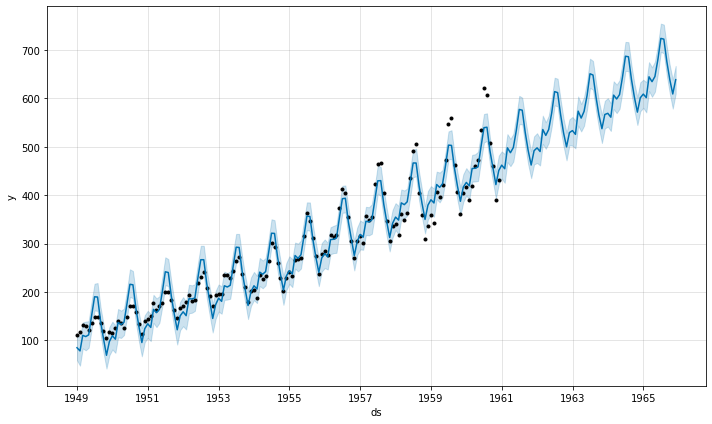

In [57]:
model.plot(forecast)
pyplot.show()


In [58]:

future = model.make_future_dataframe(periods=60, freq='M')

In [59]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
199,1965-07-31,722.252737,692.938610,750.872117,655.442865,648.553804,661.769533
200,1965-08-31,675.826347,644.129898,706.809553,658.556808,651.478105,665.084445
201,1965-09-30,639.058417,607.766068,668.986635,661.570301,654.313630,668.250276
202,1965-10-31,608.992968,579.250176,637.673589,664.684244,657.265842,671.556865
203,1965-11-30,638.584007,609.427765,669.123738,667.697737,660.060515,674.743129


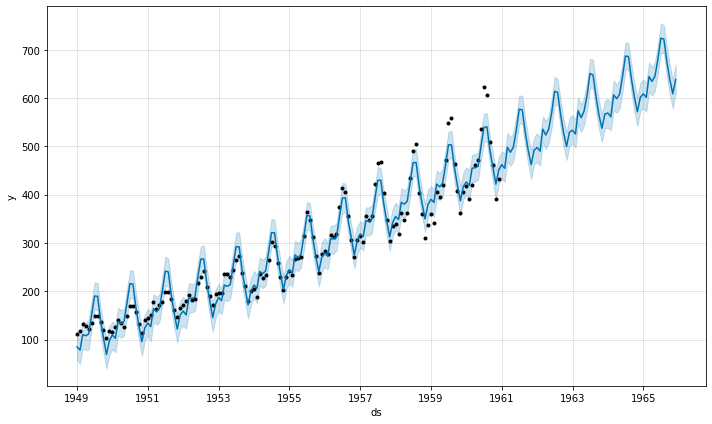

In [60]:
model.plot(forecast)
pyplot.show()

In [61]:
model = Prophet()
model.fit(df[:132])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
forecast = model.predict(df[132:])

In [63]:
y_true = df['y'][132:].values
y_pred = forecast['yhat'].values

MAE: 33.92


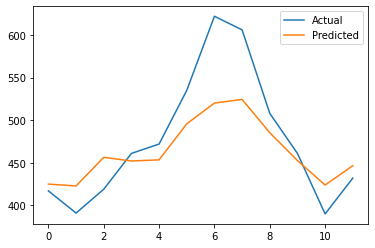

In [64]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.2f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()